In [1]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
origin_data = sio.loadmat('Data/rgbd_mtv.mat')
label = origin_data['gt'][:, 0]
all_features = origin_data['X']

view_shape = []
views = []
for v in all_features[0]:
    view_shape.append(v.shape[1])
    views.append(v)

In [3]:
labelSubjects = np.array(label[0: 500])
labelSubjects = labelSubjects - labelSubjects.min() + 1
labelSubjects = np.squeeze(labelSubjects)

In [4]:
# 我们先从single_view 开始，以第一个视图为例
single_view = views[0]
num_classes = np.unique(label).shape[0]

reg1 = 1.0
reg2 = 1.0
alpha = max(0.4 - (num_classes - 1) / 10 * 0.1, 0.1)
lr = 1e-3
views[0] = np.transpose(views[0], [0, 3, 1, 2])
views[1] = np.transpose(views[1], [0, 3, 1, 2])
del views[2]

In [5]:
tensors = [torch.from_numpy(arr) for arr in (views)]

In [6]:
# from MvDSCN import MsDSCN
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# init_model = MsDSCN(views_data=tensors, n_samples=label.shape[0], device=device, learning_rate=1e-3, epochs=10000, ft=False, label=labelSubjects)
# model = init_model.train()
# torch.cuda.empty_cache()
# torch.save(model, 'pre_train_models/mvc_pretrained_auto_enc.pt')

# model = torch.load('pre_train_models/mvc_pretrained_auto_enc.pt')

In [8]:
tensors[0] = tensors[0].to('cuda')
tensors[1] = tensors[1].to('cuda')
view1_out, view2_out, view1_r_out, view2_r_out = model(tensors)

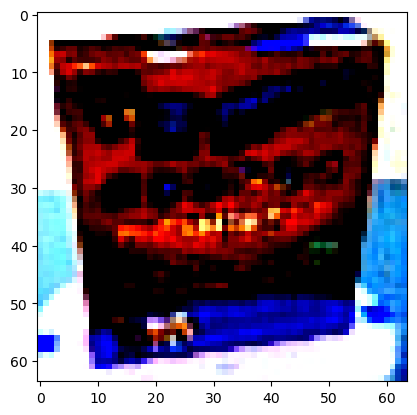

In [11]:
rec_data = view1_out.detach().cpu().numpy()
plt.imshow(np.transpose(np.clip(rec_data[100], 0, 1), [1, 2, 0]))

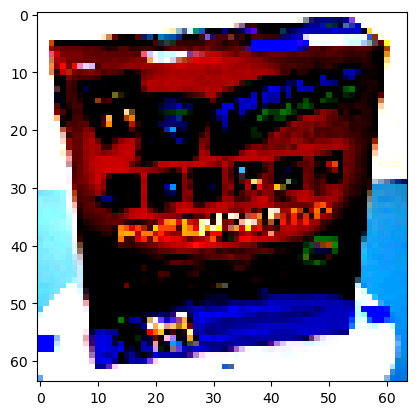

In [12]:
plt.imshow(np.transpose(np.clip(views[0][100], 0, 1), [1, 2, 0]))

============loading pretrained params============
AutoEncoderInit(
  (encoder1): Encoder(
    (conv_block1): ConvBlock(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (relu): ReLU()
    )
    (conv_block2): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (relu): ReLU()
    )
    (conv_block3): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (relu): ReLU()
    )
  )
  (encoder2): Encoder(
    (conv_block1): ConvBlock(
      (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (relu): ReLU()
    )
    (conv_block2): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (relu): ReLU()
    )
    (conv_block3): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (relu): ReLU()
    )
  )
  (encoder1_single): Encoder(
    (conv_block1): ConvBlock(

# Epoch 9, train_loss: 14639051.0000, rec_loss: 11549198.0000, self_exp_loss: 3089820.5000, reg_loss: 13.2651, hisc-loss: 0.0044:  10%|█         | 10/100 [00:03<00:26,  3.41it/s]

nmi: 0.6070 accuracy: 0.3300 F-measure: 0.1777 RI: 0.9680 AR: 0.1615


# Epoch 19, train_loss: 11375109.0000, rec_loss: 10618940.0000, self_exp_loss: 756101.1250, reg_loss: 18.7985, hisc-loss: 0.0864:  20%|██        | 20/100 [00:04<00:18,  4.43it/s] 

nmi: 0.6240 accuracy: 0.3760 F-measure: 0.2109 RI: 0.9685 AR: 0.1950


# Epoch 29, train_loss: 9950361.0000, rec_loss: 9562123.0000, self_exp_loss: 388149.5625, reg_loss: 21.1631, hisc-loss: 0.2580:  30%|███       | 30/100 [00:06<00:15,  4.47it/s]  

nmi: 0.6343 accuracy: 0.3740 F-measure: 0.2136 RI: 0.9694 AR: 0.1980


# Epoch 39, train_loss: 8740062.0000, rec_loss: 8429864.0000, self_exp_loss: 310094.8125, reg_loss: 22.6528, hisc-loss: 0.4599:  40%|████      | 40/100 [00:08<00:13,  4.50it/s]

nmi: 0.6275 accuracy: 0.3780 F-measure: 0.2068 RI: 0.9691 AR: 0.1912


# Epoch 49, train_loss: 7636877.5000, rec_loss: 7373535.5000, self_exp_loss: 263225.3125, reg_loss: 23.9268, hisc-loss: 0.6822:  50%|█████     | 50/100 [00:09<00:11,  4.54it/s]

nmi: 0.6275 accuracy: 0.3820 F-measure: 0.2164 RI: 0.9702 AR: 0.2013


# Epoch 59, train_loss: 6768621.5000, rec_loss: 6541998.5000, self_exp_loss: 226494.1875, reg_loss: 25.2903, hisc-loss: 0.8512:  60%|██████    | 60/100 [00:11<00:08,  4.57it/s]

nmi: 0.6305 accuracy: 0.3840 F-measure: 0.2123 RI: 0.9701 AR: 0.1971


# Epoch 69, train_loss: 6131228.0000, rec_loss: 5930115.0000, self_exp_loss: 200971.7812, reg_loss: 26.7010, hisc-loss: 0.9419:  70%|███████   | 70/100 [00:13<00:06,  4.48it/s]

nmi: 0.6330 accuracy: 0.3860 F-measure: 0.2210 RI: 0.9708 AR: 0.2062


# Epoch 79, train_loss: 5595675.5000, rec_loss: 5407584.0000, self_exp_loss: 187938.1719, reg_loss: 28.1664, hisc-loss: 0.9678:  80%|████████  | 80/100 [00:14<00:04,  4.57it/s]

nmi: 0.6281 accuracy: 0.3860 F-measure: 0.2179 RI: 0.9707 AR: 0.2030


# Epoch 89, train_loss: 5112244.5000, rec_loss: 4932764.5000, self_exp_loss: 179315.6562, reg_loss: 29.7016, hisc-loss: 0.9411:  90%|█████████ | 90/100 [00:16<00:02,  4.61it/s]

nmi: 0.6152 accuracy: 0.3700 F-measure: 0.2048 RI: 0.9688 AR: 0.1890


# Epoch 99, train_loss: 4711960.0000, rec_loss: 4538508.0000, self_exp_loss: 173276.7812, reg_loss: 31.2841, hisc-loss: 0.8841: 100%|██████████| 100/100 [00:18<00:00,  5.49it/s]

nmi: 0.6157 accuracy: 0.3620 F-measure: 0.2050 RI: 0.9691 AR: 0.1893


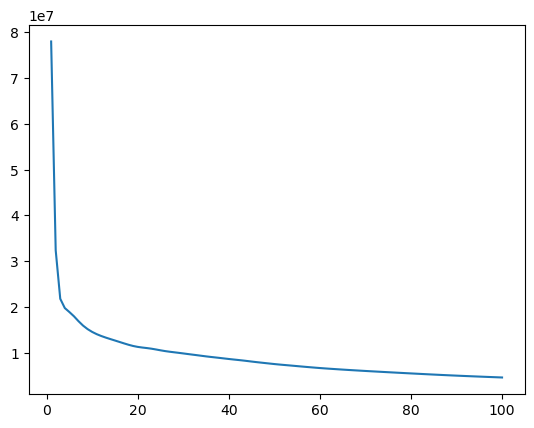

In [7]:
from MvDSCN import MsDSCN

self_exp_ae = MsDSCN(views_data=tensors, n_samples=label.shape[0], device=device, learning_rate=1e-3, epochs=100, ft=True, model_path='pre_train_models/mvc_pretrained_auto_enc.pt' ,label=labelSubjects, show_res=10)
self_exp_model = self_exp_ae.train()

In [8]:
torch.cuda.empty_cache()

In [9]:
view1_out, view2_out, view1_r_out, view2_r_out, z1, z2, z_common, diversity_latent_1, diversity_latent_2, latent1, latent2, latent1_diversity_se, latent2_diversity_se, latent1_se, latent2_se = self_exp_model(tensors)

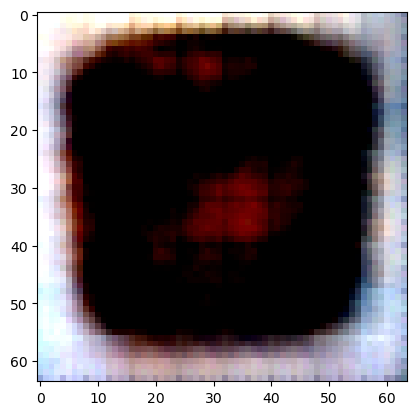

In [10]:
rec_data = view1_out.detach().cpu().numpy()
plt.imshow(np.transpose(np.clip(rec_data[100], 0, 1), [1, 2, 0]))

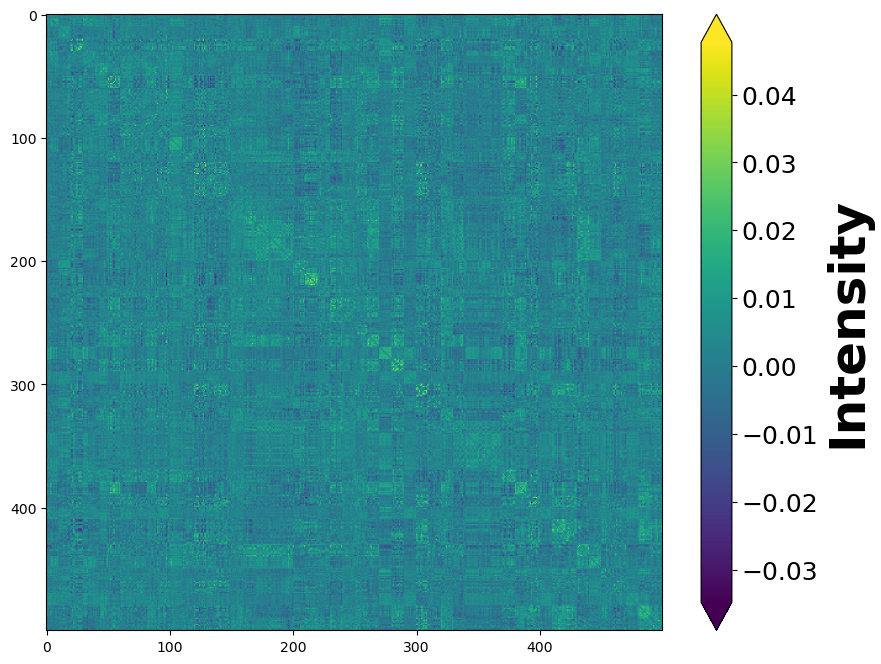

In [39]:
fig = plt.figure(figsize=(10,8))
ax = plt.gca()
cax = plt.imshow(z_common.detach().cpu().numpy())
# set up colorbar
cbar = plt.colorbar(cax, extend='both', drawedges = False)
cbar.set_label('Intensity',size=36, weight='bold')
cbar.ax.tick_params(labelsize=18)
plt.show()

In [40]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
# show clustering results
from metric import thrC, post_proC, err_rate, f1_score, rand_index_score

alpha = max(0.4 - (num_classes - 1) / 10 * 0.1, 0.1)
Coef = thrC(z_common.detach().cpu().numpy(), alpha)
sio.savemat('./result/rgbd_coef.mat', dict([('coef', Coef)]))
y_hat, L = post_proC(Coef, labelSubjects.max(), 3, 1)
missrate_x = err_rate(labelSubjects, y_hat)
acc_x = 1 - missrate_x
nmi = normalized_mutual_info_score(labelSubjects, y_hat)
f_measure = f1_score(labelSubjects, y_hat)
ri = rand_index_score(labelSubjects, y_hat)
ar = adjusted_rand_score(labelSubjects, y_hat)
print("nmi: %.4f" % nmi, "accuracy: %.4f" % acc_x, "F-measure: %.4f" % f_measure, "RI: %.4f" % ri, "AR: %.4f" % ar)

nmi: 0.6286 accuracy: 0.3800 F-measure: 0.2176 RI: 0.9706 AR: 0.2026


In [ ]:
class ConvAEInit(nn.Module):
    def __init__(self):
        super(ConvAEInit, self).__init__()
        kernelSize = [3, 3, 3]
        numHidden = [8, 16, 32]
        numSubj = 50
        numPerSubj = 10
        self.batch_size = numSubj * numPerSubj

        self.padEncL1 = nn.ZeroPad2d((1, 2, 1, 2))
        self.encL1 = nn.Conv2d(3, numHidden[0], kernel_size=kernelSize[0], stride=2, padding=1)

        self.padEncL2 = nn.ZeroPad2d((1, 1, 2, 1))
        self.encL2 = nn.Conv2d(numHidden[0], numHidden[1], kernel_size=kernelSize[1], stride=2, padding=1)
        self.padEncL2p = nn.ZeroPad2d((0, 0, -1, 0))

        self.padEncL3 = nn.ZeroPad2d((1, 1, 2, 1))
        self.encL3 = nn.Conv2d(numHidden[1], numHidden[2], kernel_size=kernelSize[2], stride=2, padding=1)
        self.padEncL3p = nn.ZeroPad2d((0, 0, -1, 0))

        self.decL1 = nn.ConvTranspose2d(numHidden[2], numHidden[1], kernel_size=kernelSize[2], stride=2, output_padding=1, padding=1)
        self.padDecL1 = nn.ZeroPad2d((0, -1, 0, -1))

        self.decL2 = nn.ConvTranspose2d(numHidden[1], numHidden[0], kernel_size=kernelSize[1], stride=2, output_padding=1, padding=1)
        self.padDecL2 = nn.ZeroPad2d((0, -1, 0, -1))

        self.decL3 = nn.ConvTranspose2d(numHidden[0], 3, kernel_size=kernelSize[0], stride=2, output_padding=1, padding=1)
        self.padDecL3 = nn.ZeroPad2d((-1, -2, -1, -2))

    def forward(self, x):
        # Z1 = F.relu(self.encL1(self.padEncL1(x)))
        Z1 = F.relu(self.encL1(x))
        # Z2 = F.relu(self.padEncL2p(self.encL2(self.padEncL2(Z1))))
        Z2 = F.relu(self.encL2(Z1))
        # Z3 = F.relu(self.padEncL3p(self.encL3(self.padEncL3(Z2))))
        Z3 = F.relu(self.encL3(Z2))
        # RZ3 = F.relu(self.padDecL1(self.decL1(Z3)))
        RZ3 = F.relu(self.decL1(Z3))
        # RZ2 = F.relu(self.padDecL2(self.decL2(RZ3)))
        RZ2 = F.relu(self.decL2(RZ3))
        # output = F.relu(self.padDecL3(self.decL3(RZ2)))
        output = F.relu(self.decL3(RZ2))
        return output

In [ ]:
init_ae = ConvAEInit()

In [ ]:
import copy
X = copy.deepcopy(single_view)
X = torch.Tensor(X)

In [ ]:
# This cell is employed to show the dimensions changed by autoencoder

# ZeroPad2D: (padding_left, padding_right, padding_top, padding_bottom)
# nn.Conv2d layer, the input and output dims are changed by following:
# H_out = \frac{H_in + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1}{stride[0]} + 1
# W_out = \frac{W_in + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1}{stride[1]} + 1
display(X.shape)
# display(init_ae.encL1(X).shape, init_ae.padEncL1(X).shape)
x1 = F.relu(init_ae.encL1((X)))
display(x1.shape)
# F.relu(self.padEncL2p(self.encL2(init_ae.padEncL2(Z1))))
x2 = F.relu((init_ae.encL2((x1))))
display(x2.shape)
x3 = F.relu((init_ae.encL3((x2))))
display(x3.shape)
print('==============================================')
rx_3 = F.relu((init_ae.decL1(x3)))
display(rx_3.shape)
rx_2 = F.relu((init_ae.decL2(rx_3)))
display(rx_2.shape)
output = F.relu((init_ae.decL3(rx_2)))
display(output.shape)

In [ ]:
torch.reshape(x3, [500, -1]).shape

In [ ]:
import random
from tqdm import tqdm
# ae初始化
def train_ae(data, n_epochs, weight_decay=1e-2, random_seed=2023):
    device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    seed = random_seed
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    model = ConvAEInit().to(device)
    data = data.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    for epoch in tqdm(range(1, n_epochs + 1)):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        # loss = F.mse_loss(data, out, reduction="none")
        # loss = loss.sum(dim=[1,2,3]).mean(dim=[0])
        loss = torch.sum(torch.pow(out - data, 2.0))
        loss.backward()
        if epoch % 1000 == 0:
            print(loss)
        # torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clipping)
        optimizer.step()
    return model

init_ae = train_ae(X, n_epochs=100000)
torch.save(init_ae, 'pre_train_models/my_demo_ae.pt')
torch.cuda.empty_cache()

In [ ]:
rec_data = init_ae(X.to('cuda')).detach().cpu().numpy()
plt.imshow(np.transpose(np.clip(rec_data[100], 0, 1), [1, 2, 0]))

In [ ]:
plt.imshow(np.transpose(np.clip(single_view[100], 0, 1), [1, 2, 0]))

In [ ]:
class ConvASelfExpEInit(nn.Module):
    def __init__(self):
        super(ConvASelfExpEInit, self).__init__()
        kernelSize = [3, 3, 3]
        numHidden = [8, 16, 32]
        numSubj = 50
        numPerSubj = 10
        rankEs = 10 * numSubj
        self.batch_size = numSubj * numPerSubj

        self.encL1 = nn.Conv2d(3, numHidden[0], kernel_size=kernelSize[0], stride=2, padding=1)

        self.encL2 = nn.Conv2d(numHidden[0], numHidden[1], kernel_size=kernelSize[1], stride=2, padding=1)

        self.encL3 = nn.Conv2d(numHidden[1], numHidden[2], kernel_size=kernelSize[2], stride=2, padding=1)

        # cc = torch.nn.Parameter(1.0e-8 * torch.ones(self.batch_size, rankEs, dtype=torch.float32), requires_grad=True)
        # self.C1 = nn.Parameter(torch.Tensor(cc), requires_grad=True)
        self.C1 = nn.Parameter(1.0e-8 * torch.ones(self.batch_size, self.batch_size, dtype=torch.float32), requires_grad=True)

        self.decL1 = nn.ConvTranspose2d(numHidden[2], numHidden[1], kernel_size=kernelSize[2], stride=2, output_padding=1, padding=1)

        self.decL2 = nn.ConvTranspose2d(numHidden[1], numHidden[0], kernel_size=kernelSize[1], stride=2, output_padding=1, padding=1)

        self.decL3 = nn.ConvTranspose2d(numHidden[0], 3, kernel_size=kernelSize[0], stride=2, output_padding=1, padding=1)

    def forward(self, x):
        # Z1 = F.relu(self.encL1(self.padEncL1(x)))
        Z1 = F.relu(self.encL1(x))
        # Z2 = F.relu(self.padEncL2p(self.encL2(self.padEncL2(Z1))))
        Z2 = F.relu(self.encL2(Z1))
        # Z3 = F.relu(self.padEncL3p(self.encL3(self.padEncL3(Z2))))
        Z3 = F.relu(self.encL3(Z2))

        # y = (torch.matmul(self.C1, torch.transpose(self.C1, 0, 1)) - torch.diag(torch.diag(torch.matmul(self.C1, torch.transpose(self.C1, 0, 1))))).mm(Z3.view(self.batch_size, -1))
        # y = y.view(Z3.size())
        y = (self.C1 - torch.diag(torch.diag(self.C1))).mm(Z3.view(self.batch_size, -1))
        y = y.view(Z3.size())
        # RZ3 = F.relu(self.padDecL1(self.decL1(Z3)))
        RZ3 = F.relu(self.decL1(y))
        # RZ2 = F.relu(self.padDecL2(self.decL2(RZ3)))
        RZ2 = F.relu(self.decL2(RZ3))
        # output = F.relu(self.padDecL3(self.decL3(RZ2)))
        output = F.relu(self.decL3(RZ2))
        return Z3, y, self.C1, output

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
self_exp_ae = ConvASelfExpEInit()
self_exp_ae.to(device)

In [ ]:
parametersAE = dict([(name, param) for name, param in init_ae.named_parameters()])
import os
seedValue = 2023
for name, param in self_exp_ae.named_parameters():
    if name in parametersAE:
        param_pre  = parametersAE[name]
        param.data = param_pre.data

random.seed(seedValue)
os.environ['PYTHONHASHSEED'] = str(seedValue)
np.random.seed(seedValue)
torch.manual_seed(seedValue)
torch.cuda.manual_seed(seedValue)
torch.cuda.manual_seed_all(seedValue)  # if you are using multi-GPU.
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
self_exp_ae.C1.data = (torch.Tensor(1.0e-4 * np.random.randn(X.shape[0], 500))).cuda()

In [ ]:
from metric import thrC, post_proC, err_rate

optimizer = torch.optim.Adam(self_exp_ae.parameters(), lr=lr)
numSamples = single_view.shape[0]

data = X.to(device)

epoch_iter = tqdm(range(5000))
for epoch in epoch_iter:
    Z1, Y, C1, output = self_exp_ae(data)
    regLoss = 1 * (torch.norm(C1, p=2)**2)
    reconLoss = 1 * torch.norm(output - data, p=2) ** 2
    expLoss = 0.1 * (torch.norm(Z1 - Y, p=2) ** 2)
    loss = reconLoss + regLoss + alpha * expLoss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_iter.set_description(f"# Epoch {epoch}, train_loss: {loss.item():.4f}, self express lose: {expLoss:.4f}")

    if epoch > 0 and epoch % 1000 == 0:
        print("Losses  " + "Reconstruction: %.8f     Expression: %.8f     Regularization: %.8f" % (reconLoss / numSamples, expLoss, regLoss))
        mm1 = C1.detach().cpu().numpy()
        Coef = thrC(np.dot(mm1, mm1.T), alpha)
        yHat, _ = post_proC(Coef, labelSubjects.max(), 11, 3)
        errorClus = err_rate(labelSubjects, yHat)
        accuClus = 1 - errorClus
        print("Accuracy after %d" % (epoch), "Iterations: %.4f" % accuClus)

In [ ]:
rec_self_data = self_exp_ae(data)[3].detach().cpu().numpy()
plt.imshow(np.transpose(np.clip(rec_self_data[50], 0, 1), [1, 2, 0]))

In [ ]:
plt.imshow(np.transpose(np.clip(rec_data[50], 0, 1), [1, 2, 0]))

In [ ]:
plt.imshow(np.transpose(np.clip(X[50], 0, 1), [1, 2, 0]))

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.gca()
cax = plt.imshow(self_exp_ae.C1.detach().cpu().numpy(), cmap='viridis')
# set up colorbar
cbar = plt.colorbar(cax, extend='both', drawedges = False)
cbar.set_label('Intensity',size=36, weight =  'bold')
cbar.ax.tick_params( labelsize=18 )
plt.show()

In [ ]:
# here, we start to train a multi-view auto-encoder
